In [ ]:
!git clone https://github.com/shreyesss/CVI-Project-apps.git
%cd CVI-Project-apps/CV_PS_imgs/
!ls

Cloning into 'CVI-Project-apps'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 27 (delta 5), reused 11 (delta 0), pack-reused 0
Unpacking objects: 100% (27/27), done.
/content/CVI-Project-apps/CV_PS_imgs
LD_test_imgs  sample_imgs


In [ ]:
#Importing a few relevant packages
#The numpy library contains optimised functions that are used to operate on multi-dimensional arrays 
#cv2 is an OpenCV library containing functions used in Computer Vision
#matplotlib is a python plotting library

import numpy as np  
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow 

                         Sample image in Color Form


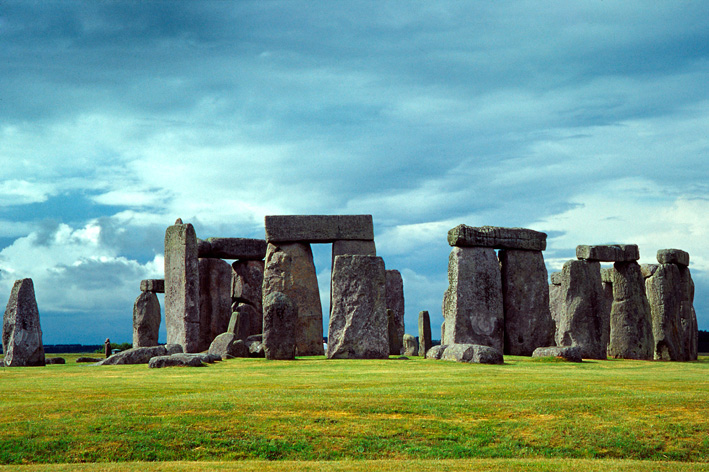


                         Sample image in Black and White Form


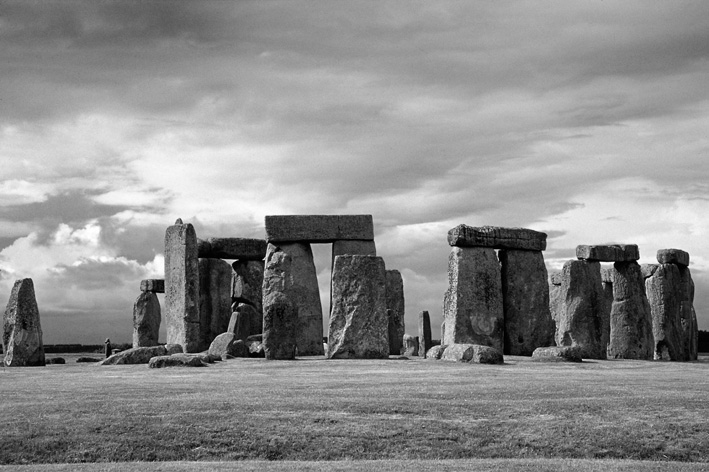

True

In [ ]:
#EXERCISE: GETTING STARTED WITH IMAGES- READING, DISPLAYING AND WRITING AN IMAGE 

"""
Using the functions described above, write a program to read the image 'sample.jpg' in BGR and Grayscale separately
display them and save the Grayscale image as 'sample_BW.jpg'
"""
#NOTE: Path of sample.jpg is "sample_imgs/sample.jpg"; write sample_BW.jpg to the path "sample_imgs/sample_BW.jpg" 

sample_color = cv2.imread('sample_imgs/sample.jpg',1)
sample_BW = cv2.imread('sample_imgs/sample.jpg',0)
print("{:25}Sample image in Color Form".format(' '))

cv2_imshow(sample_color)

print()         #printing a line just to create space between the two images
print("{:25}Sample image in Black and White Form".format(' '))

cv2_imshow(sample_BW)

cv2.imwrite("sample_imgs/sample_BW.jpg",sample_BW)  #this will print True if run successfully

      Image in HSV Scale


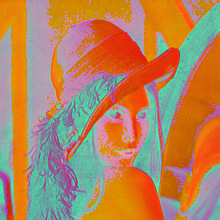


      Image in Black and White Form


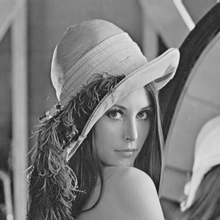


      Image Hue


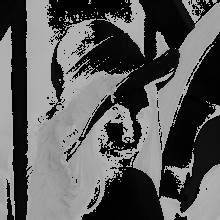


      Image Saturation


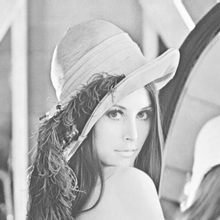


      Image Value


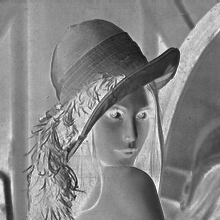

In [ ]:
#EXERCISE: CHANGING COLOUR SPACES 

"""
Using the functions described above, write a program to read the image 'hat_lady.png' in BGR convert them to
GRAY and HSV, use numpy slicing to store hue, saturation and value channels separately in variables, display 
all the images (except the input) in separate windows. 
"""
#NOTE: Path of hat_lady.png is "sample_imgs/hat_lady.png"

hat_lady_bgr = cv2.imread('sample_imgs/hat_lady.png',1)
hat_lady_hsv = cv2.cvtColor(hat_lady_bgr,cv2.COLOR_BGR2HSV)
hat_lady_gray = cv2.cvtColor(hat_lady_bgr,cv2.COLOR_BGR2GRAY)

hat_lady_hue,hat_lady_value,hat_lady_saturation = hat_lady_hsv[:,:,0],hat_lady_hsv[:,:,1],hat_lady_hsv[:,:,2] 

print("{:5} Image in HSV Scale".format(' '))
cv2_imshow(hat_lady_hsv)
print()

print("{:5} Image in Black and White Form".format(' '))
cv2_imshow(hat_lady_gray)
print()

print("{:5} Image Hue".format(' '))
cv2_imshow(hat_lady_hue)
print()

print("{:5} Image Saturation".format(' '))
cv2_imshow(hat_lady_saturation)
print()

print("{:5} Image Value".format(' '))
cv2_imshow(hat_lady_value)

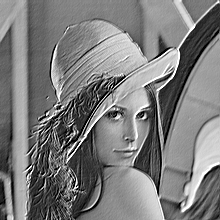

In [ ]:
#EXERCISE : 2D CONVOLUTION OPERATION 

"""
Write a program that performs a 2D convolution on the image 'hat_lady.png' with a 3x3 kernel, create a 
randomkernel with element values of your choice. Remember that if the kernel weights are too high or too 
low, the pixels get thresholded to 255 or 0 respectively. 
"""

kernel = np.array([[0,0,1],[0,2,-1],[0,0,-1]])

filtered_image = cv2.filter2D(hat_lady_gray,-1, kernel)

cv2_imshow(filtered_image)

Gaussian Blurred image


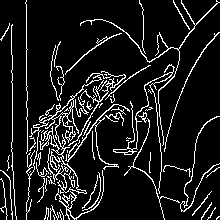


Filtered with bilateralFilter image


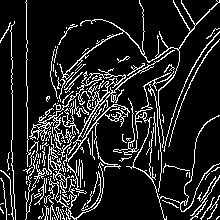

In [ ]:
#EXERCISE : EDGE DETECTION 

"""
write a Program that performs Gaussian Bluring and Canny edge Detection on 'hat_lady.png',
Display the Canny Output.
"""

Blurred_image = cv2.GaussianBlur(hat_lady_gray,(3,3),0,0)
Blurred_image1 = cv2.bilateralFilter(hat_lady_gray,3,0,0)
edge_detected_img = cv2.Canny(Blurred_image,50,150,3)
edge_detected_img1 = cv2.Canny(Blurred_image1,50,150,3)

print("Gaussian Blurred image")
cv2_imshow(edge_detected_img)
print()
print("Filtered with bilateralFilter image")
cv2_imshow(edge_detected_img1)

#  Hence, we can use bilateralFilter instead of Gaussian Blurring as it preserves the edges.

Test image 1 of Lane detection

Input Image


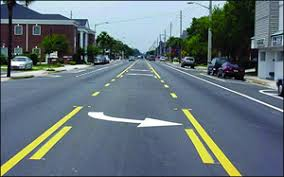


Output Image


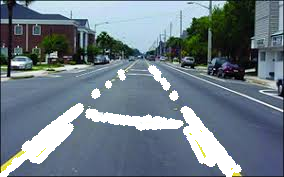

In [ ]:
# MINI-PROJECT: LANE DETECTION

"""
Input for Program: Image of a road with clearly labelled lanes
Expected Output: Lanes highlighted with white superimposed on the original image
Read the input images from the folder 'LD_test_imgs' and show the output images in the notebook.
You may check the following functions out:
1. cv2.inRange()
2. cv2.bitwise_or() and cv2.bitwise_and
3. cv2.fillPoly()
4. cv2.line()
5. cv2.addWeighted()
In addition, you may consider the structure of the program (functions that one may define) we discussed 
in the previous cell.

Fill in your code in place of 'pass'.
"""

def img2edge(img):
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hsv_image  = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    """
    Define ranges for 'yellow', pixels within this range will be picked
    """
    lower_yellow = np.array([30,100,100])
    upper_yellow = np.array([35,255,255])

    """
    cv2.inRange(): Picks pixels from the image that are in the specified range
    """
    mask_y = cv2.inRange(hsv_image,lower_yellow,upper_yellow)   
    mask_w = cv2.inRange(gray_image, 225, 255)
    """
    Compute Bitwise OR, combining both the white and yellow pixels
    """
    mask_yw = cv2.bitwise_or(mask_y,mask_w)
    """
    Compute Bitwise AND of mask_yw with gray_img, pixels that were yellow or 
    white will have the same intensity as the original grayscale image, the 
    other pixels will be removed.
    """

    mask_yw = cv2.dilate(mask_yw,np.ones(3),20)
    mask_yw_image = cv2.bitwise_and(gray_image,gray_image,mask = mask_yw)
    img_blur = cv2.bilateralFilter(mask_yw_image,3, 0, 0)     #bilateral Filter used in place of gaussian as it would preserve edges.
    img_canny = cv2.Canny(img_blur, 80, 200,3)

    return img_canny
    
def roi_select(img, canny):
    """
    Define the vertices of the region of interest
    """
    lower_left = (0,177)
    lower_right = (250,177)
    top_left = (100,60)
    top_right = (200,60)
    vertices = [np.array([lower_left,top_left,top_right,lower_right],dtype=np.int32)]
    
    mask = np.zeros_like(canny)                     #creates a numpy array of the same dimensions as img
    fill_color = 255                                #parameter for cv2.fillPoly function
    cv2.fillPoly(mask, vertices, fill_color)        #pixels within 'vertices' in 'mask' will be made WHITE while all other pixels will be BLACK

    return cv2.bitwise_and(canny, mask)

def draw_lines(canny_roi, rho_acc, theta_acc, thresh, minLL, maxLG):
    """
    Inputs - canny_roi 
    Parameters of HoughLinesP() are passed in as parameters to draw_lines()
    Output - line_img (image of lines against a black background)

    Perform Probabilistic Hough Transform on it, draw lines on a blank image using the values 
    returned by HoughLinesP() and the openCV function cv2.line(). 
    """  
    transform = cv2.HoughLinesP(canny_roi, rho_acc, theta_acc, thresh, minLL, maxLG)
    dimensions = tuple(list(canny_roi.shape) + [3]) 
    line_img =  np.zeros(dimensions, dtype = np.uint8)

    if transform is not None:
     for line in transform:
       x1, y1, x2, y2 = line[0]     
       cv2.line(line_img, (x1, y1), (x2, y2), (255,255, 255), 5)

    return line_img

def add_weighted(img, line_img):
      image = cv2.addWeighted(img,1, line_img,3, 0)

      return image

"""
The below code is for a single image, perform the same procedure for all the images in the
directory 'LD_test_imgs' and display all of them in  output of the cell. 
"""
img = cv2.imread('LD_test_imgs/test_img01.jpeg',1)                                                      #Read the input image from the directory.
print("Input Image")
cv2_imshow(img)
print()
print("Output Image")
edge_img = img2edge(img)
roi_img = roi_select(img, edge_img)
hough_img = draw_lines(roi_img, 1, np.pi/180, 2, 2, 1)  #Change the parameters thresh, minLL, maxLG to get more accurate
lane_img = add_weighted(img, hough_img)
cv2_imshow(lane_img)


Test Image 2 of Lane detection

Input Image


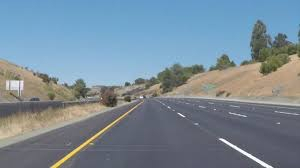


Output Image


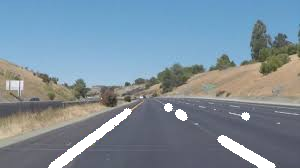

In [ ]:
def img2edge(img):
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hsv_image  = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    """
    Define ranges for 'yellow', pixels within this range will be picked
    """
    lower_yellow = np.array([30,100,100])
    upper_yellow = np.array([35,255,255])

    """
    cv2.inRange(): Picks pixels from the image that are in the specified range
    """
    mask_y = cv2.inRange(hsv_image,lower_yellow,upper_yellow)   
    mask_w = cv2.inRange(gray_image, 200, 255)
    """
    Compute Bitwise OR, combining both the white and yellow pixels
    """
    mask_yw = cv2.bitwise_or(mask_y,mask_w)
    """
    Compute Bitwise AND of mask_yw with gray_img, pixels that were yellow or 
    white will have the same intensity as the original grayscale image, the 
    other pixels will be removed.
    """

    mask_yw = cv2.dilate(mask_yw,np.ones(3),20)
    mask_yw_image = cv2.bitwise_and(gray_image,gray_image,mask = mask_yw)
    img_blur = cv2.bilateralFilter(mask_yw_image,3, 0, 0)     #bilateral Filter used in place of gaussian as it would preserve edges.
    img_canny = cv2.Canny(img_blur, 80, 200,3)

    return img_canny
    
def roi_select(img, canny):
    """
    Define the vertices of the region of interest
    """
    lower_left = (30,177)
    lower_right = (300,180)
    top_left = (90,110)
    top_right = (300,100)
    vertices = [np.array([lower_left,top_left,top_right,lower_right],dtype=np.int32)]
    
    mask = np.zeros_like(canny)                     #creates a numpy array of the same dimensions as img
    fill_color = 255                                #parameter for cv2.fillPoly function
    cv2.fillPoly(mask, vertices, fill_color)        #pixels within 'vertices' in 'mask' will be made WHITE while all other pixels will be BLACK

    return cv2.bitwise_and(canny, mask)

def draw_lines(canny_roi, rho_acc, theta_acc, thresh, minLL, maxLG):
    """
    Inputs - canny_roi 
    Parameters of HoughLinesP() are passed in as parameters to draw_lines()
    Output - line_img (image of lines against a black background)

    Perform Probabilistic Hough Transform on it, draw lines on a blank image using the values 
    returned by HoughLinesP() and the openCV function cv2.line(). 
    """  
    transform = cv2.HoughLinesP(canny_roi, rho_acc, theta_acc, thresh, minLL, maxLG)
    dimensions = tuple(list(canny_roi.shape) + [3]) 
    line_img =  np.zeros(dimensions, dtype = np.uint8)

    if transform is not None:
     for line in transform:
       x1, y1, x2, y2 = line[0]     
       cv2.line(line_img, (x1, y1), (x2, y2), (255,255, 255), 5)

    return line_img

def add_weighted(img, line_img):
      image = cv2.addWeighted(img,1, line_img,3, 0)

      return image

"""
The below code is for a single image, perform the same procedure for all the images in the
directory 'LD_test_imgs' and display all of them in  output of the cell. 
"""
img = cv2.imread('LD_test_imgs/test_img02.jpeg',1)                                                      #Read the input image from the directory.
print("Input Image")
cv2_imshow(img)
print()
print("Output Image")
edge_img = img2edge(img)
roi_img = roi_select(img, edge_img)
hough_img = draw_lines(roi_img, 1, np.pi/180, 1, 1, 1)  #Change the parameters thresh, minLL, maxLG to get more accurate
lane_img = add_weighted(img, hough_img)
cv2_imshow(lane_img)

Test Image 3 of Lane Detection

Input Image


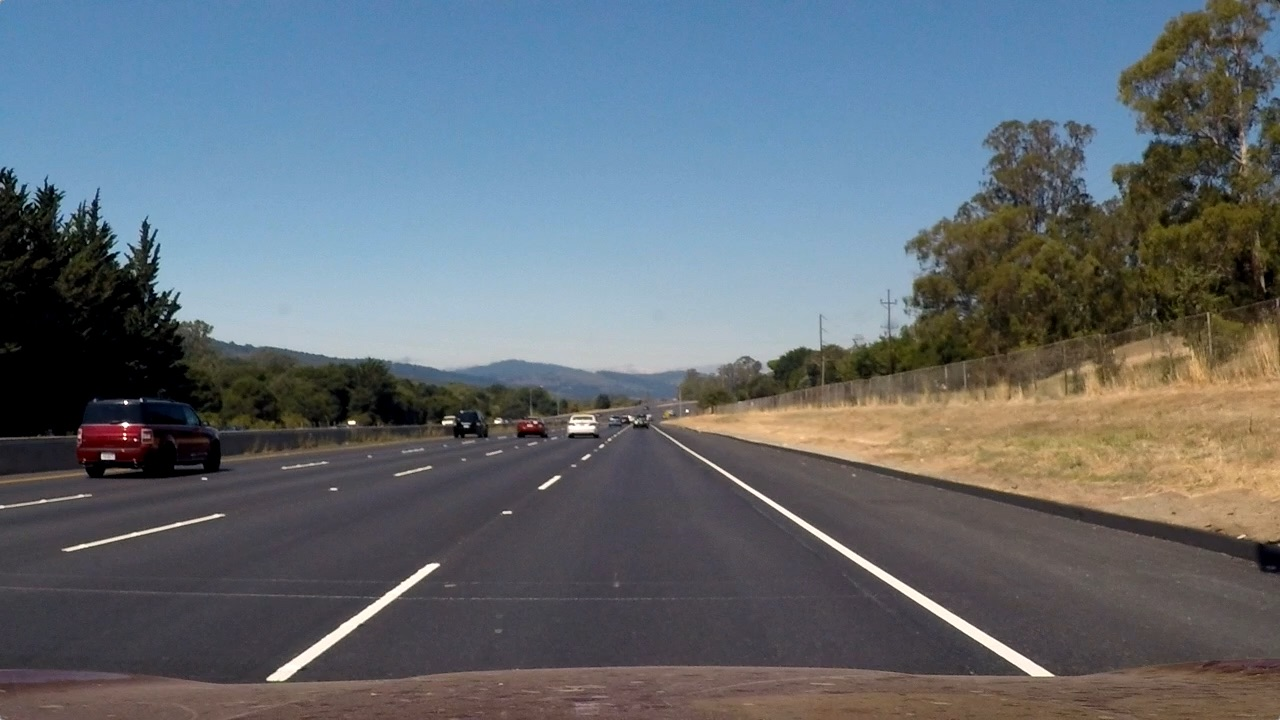


Output Image


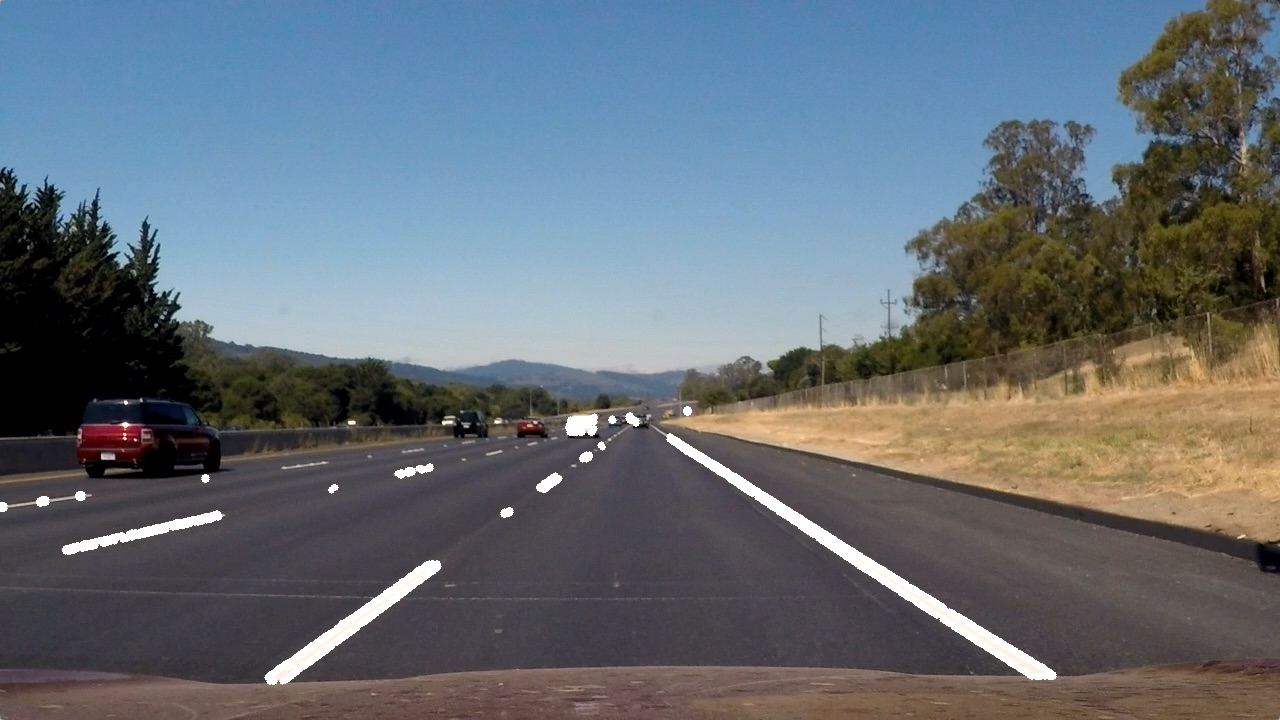

In [ ]:
def img2edge(img):
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hsv_image  = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    """
    Define ranges for 'yellow', pixels within this range will be picked
    """
    lower_yellow = np.array([30,100,100])
    upper_yellow = np.array([35,255,255])

    """
    cv2.inRange(): Picks pixels from the image that are in the specified range
    """
    mask_y = cv2.inRange(hsv_image,lower_yellow,upper_yellow)   
    mask_w = cv2.inRange(gray_image, 200, 255)
    """
    Compute Bitwise OR, combining both the white and yellow pixels
    """
    mask_yw = cv2.bitwise_or(mask_y,mask_w)
    """
    Compute Bitwise AND of mask_yw with gray_img, pixels that were yellow or 
    white will have the same intensity as the original grayscale image, the 
    other pixels will be removed.
    """

    mask_yw = cv2.dilate(mask_yw,np.ones(3),20)
    mask_yw_image = cv2.bitwise_and(gray_image,gray_image,mask = mask_yw)
    img_blur = cv2.bilateralFilter(mask_yw_image,3, 0, 0)     #bilateral Filter used in place of gaussian as it would preserve edges.
    img_canny = cv2.Canny(img_blur, 80, 200,3)

    return img_canny
    
def roi_select(img, canny):
    """
    Define the vertices of the region of interest
    """
    lower_left = (0,750)
    lower_right = (1150,750)
    top_left = (0,500)
    top_right = (700,400)
    vertices = [np.array([lower_left,top_left,top_right,lower_right],dtype=np.int32)]
    
    mask = np.zeros_like(canny)                     #creates a numpy array of the same dimensions as img
    fill_color = 255                                #parameter for cv2.fillPoly function
    cv2.fillPoly(mask, vertices, fill_color)        #pixels within 'vertices' in 'mask' will be made WHITE while all other pixels will be BLACK

    return cv2.bitwise_and(canny, mask)

def draw_lines(canny_roi, rho_acc, theta_acc, thresh, minLL, maxLG):
    """
    Inputs - canny_roi 
    Parameters of HoughLinesP() are passed in as parameters to draw_lines()
    Output - line_img (image of lines against a black background)

    Perform Probabilistic Hough Transform on it, draw lines on a blank image using the values 
    returned by HoughLinesP() and the openCV function cv2.line(). 
    """  
    transform = cv2.HoughLinesP(canny_roi, rho_acc, theta_acc, thresh, minLL, maxLG)
    dimensions = tuple(list(canny_roi.shape) + [3]) 
    line_img =  np.zeros(dimensions, dtype = np.uint8)

    if transform is not None:
     for line in transform:
       x1, y1, x2, y2 = line[0]     
       cv2.line(line_img, (x1, y1), (x2, y2), (255,255, 255), 5)

    return line_img

def add_weighted(img, line_img):
      image = cv2.addWeighted(img,1, line_img,3, 0)

      return image

"""
The below code is for a single image, perform the same procedure for all the images in the
directory 'LD_test_imgs' and display all of them in  output of the cell. 
"""
img = cv2.imread('LD_test_imgs/test_img03.jpeg',1)                                                      #Read the input image from the directory.
print("Input Image")
cv2_imshow(img)
print()
print("Output Image")
edge_img = img2edge(img)
roi_img = roi_select(img, edge_img)
hough_img = draw_lines(roi_img, 1, np.pi/180, 1, 1, 1)  #Change the parameters thresh, minLL, maxLG to get more accurate
lane_img = add_weighted(img, hough_img)
cv2_imshow(lane_img)